In [68]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import os
import numpy as np
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io

In [7]:
img_dir = 'data/dfg_data'
coco_file = 'data/dfg_data/filtered.json'

In [8]:
coco = COCO(coco_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [93]:
images = coco.getImgIds()
image_files = [i['file_name'] for i in coco.loadImgs(images)]
_id_to_file = {i: f for i, f in zip(images, image_files)}


def get_image(_id):
    return io.imread(os.path.join(img_dir, _id_to_file[_id]))


def random_image():
    _id = np.random.choice(images)
    return _id, get_image(_id)


def get_bounding_boxes(_id, img):
    anns = coco.getAnnIds(imgIds=_id)
    anns = coco.loadAnns(anns)
    bbs = [BoundingBox(x['bbox'][0], x['bbox'][1], x['bbox'][0] +
                       x['bbox'][2], x['bbox'][1] + x['bbox'][3]) for x in anns]
    return BoundingBoxesOnImage(bbs, shape=img.shape)


def test_augmentation(aug: iaa.Augmenter, title: str = 'Augmentation', img=None, bbs=None):
    if img is None or bbs is None:
        _id, img = random_image()
        bbs = get_bounding_boxes(_id, img)
    img_aug, bbs_aug = aug(image=img, bounding_boxes=bbs)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(bbs.draw_on_image(np.array(img), size=8))
    plt.subplot(1, 2, 2)
    plt.imshow(bbs_aug.draw_on_image(
        np.array(img_aug), size=8))
    plt.title(title)
    plt.savefig('examples/'+title + '.jpg', dpi=300, bbox_inches='tight')
    plt.show()

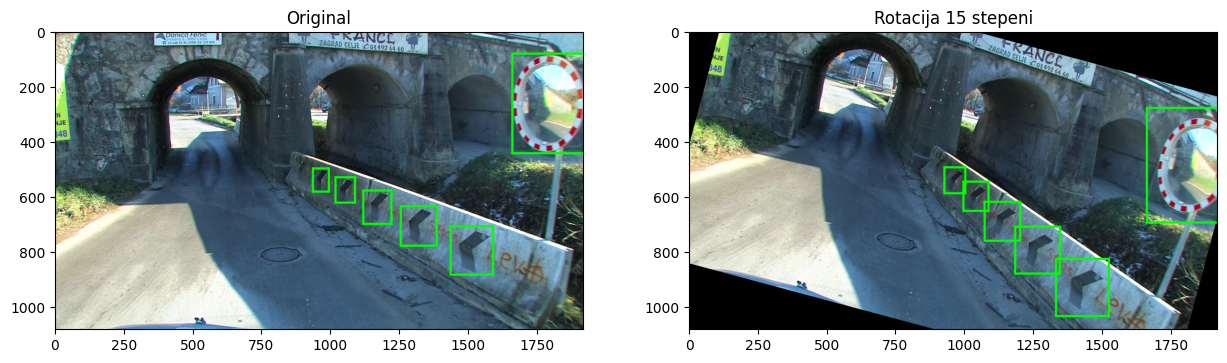

In [97]:
rotate = iaa.Rotate(rotate=15)
test_augmentation(rotate, 'Rotacija 15 stepeni')

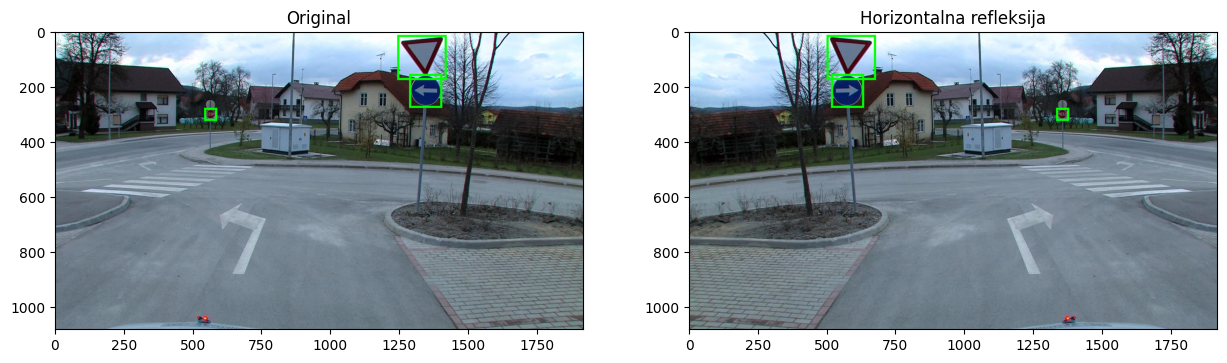

In [98]:
flip = iaa.Fliplr(1.0)
test_augmentation(flip, 'Horizontalna refleksija')

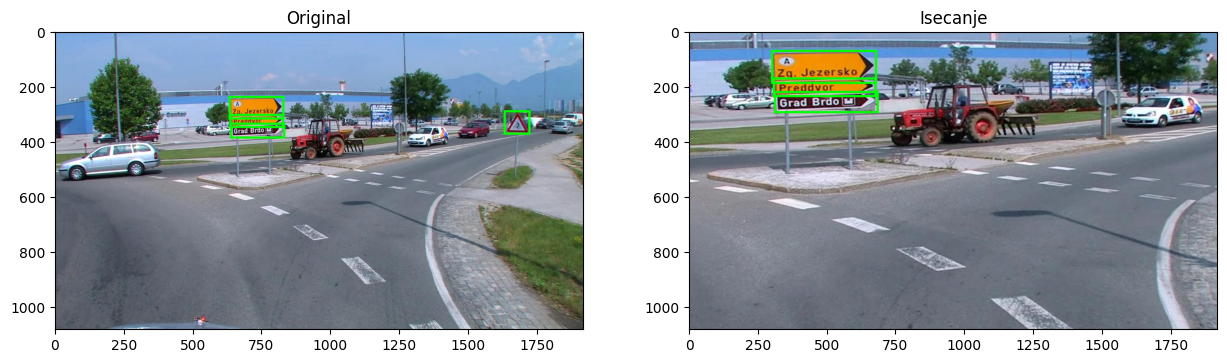

In [105]:
crop = iaa.Crop(percent=(0.1, 0.3))
test_augmentation(crop, 'Isecanje')

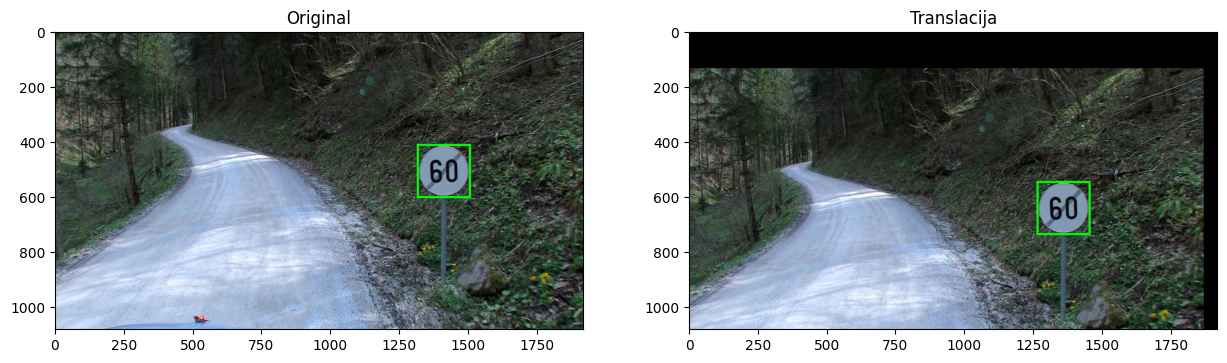

In [106]:
translate = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
test_augmentation(translate, 'Translacija')

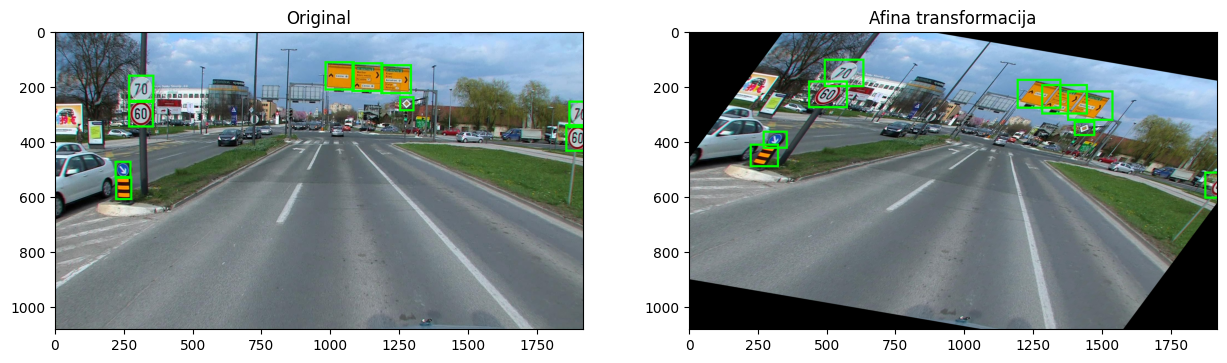

In [118]:
affine = iaa.Affine(scale=(0.5, 1.5), rotate=(-15, 15), shear=27)
test_augmentation(affine, 'Afina transformacija')

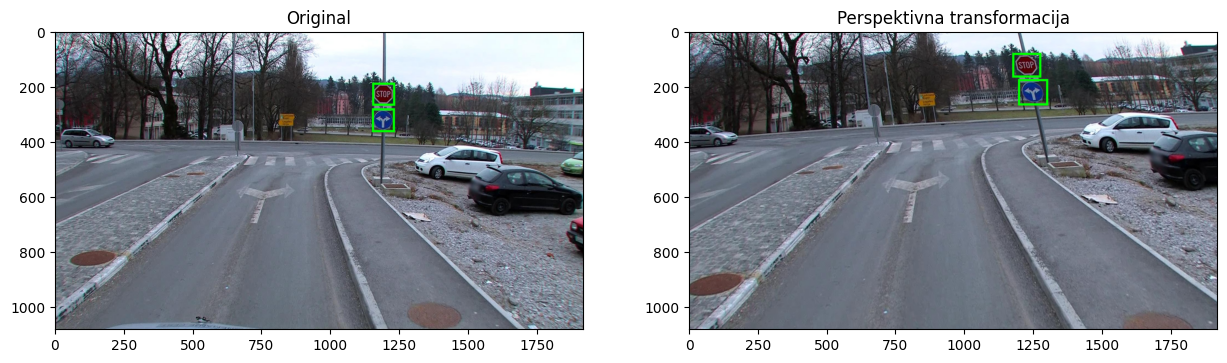

In [136]:
perspective = iaa.PerspectiveTransform(scale=0.1)
test_augmentation(perspective, 'Perspektivna transformacija')

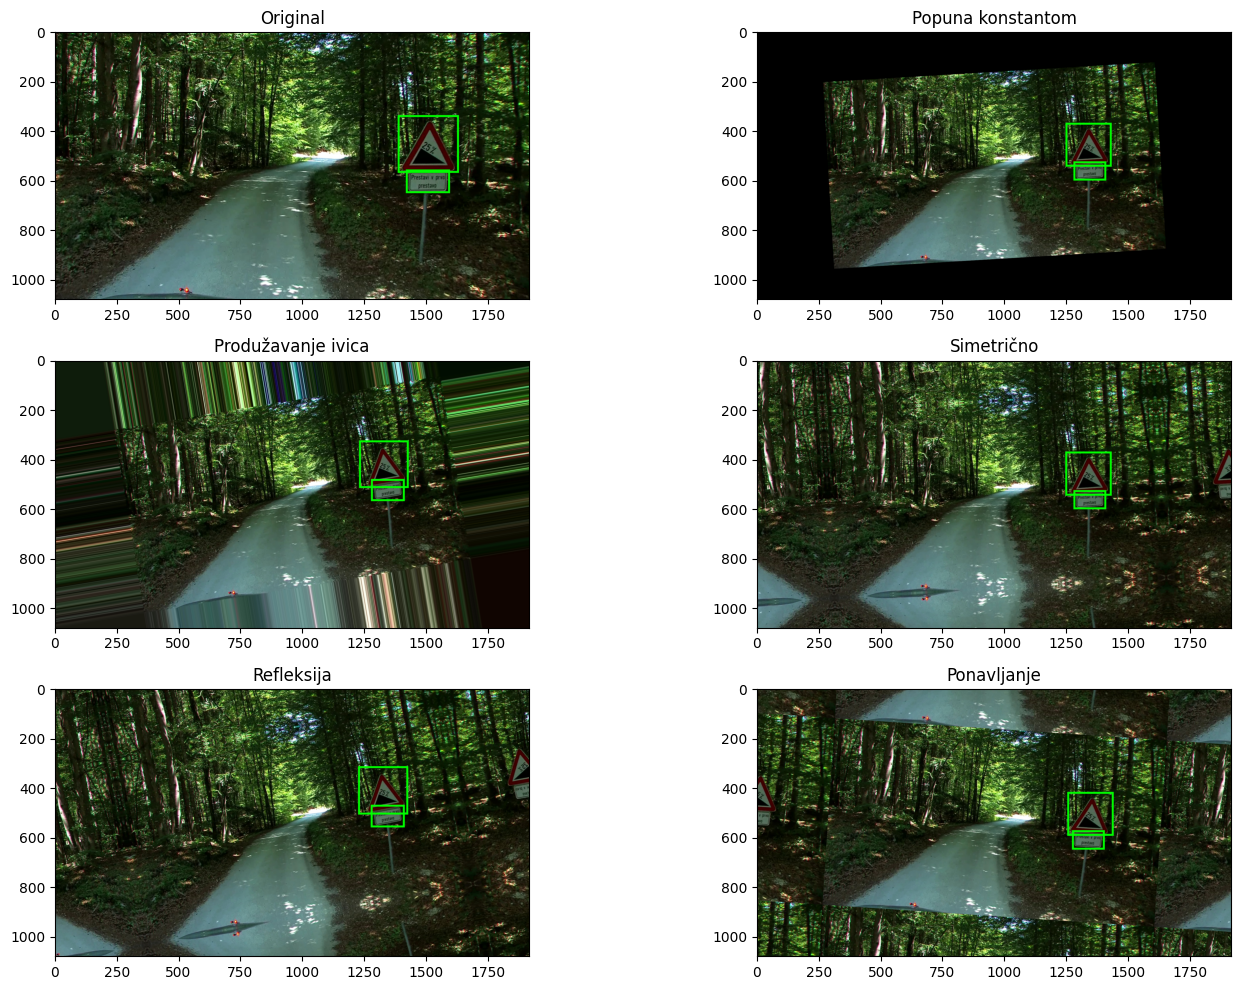

In [139]:

_id, img = random_image()
bbs = get_bounding_boxes(_id, img)
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.imshow(bbs.draw_on_image(np.array(img), size=8))
plt.title('Original')
modovi = ['Popuna konstantom', 'Produžavanje ivica',
          'Simetrično', 'Refleksija', 'Ponavljanje']
for i, mode in enumerate(['constant', 'edge', 'symmetric', 'reflect', 'wrap']):
    aug = iaa.Affine(scale=0.7, rotate=(-15, 15), mode=mode)
    plt.subplot(3, 2, i+2)
    img_aug, bbs_aug = aug(image=img, bounding_boxes=bbs)
    plt.imshow(bbs_aug.draw_on_image(np.array(img_aug), size=8))
    plt.title(modovi[i])
plt.tight_layout()
plt.savefig('examples/Border_modes.jpg', dpi=300, bbox_inches='tight')
plt.show()